In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("Boston.csv")

In [2]:
data = data.drop('Unnamed: 0', axis=1) 

In [3]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'medv']
y = data.loc[:, data.columns == 'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379, 1)
(127, 1)


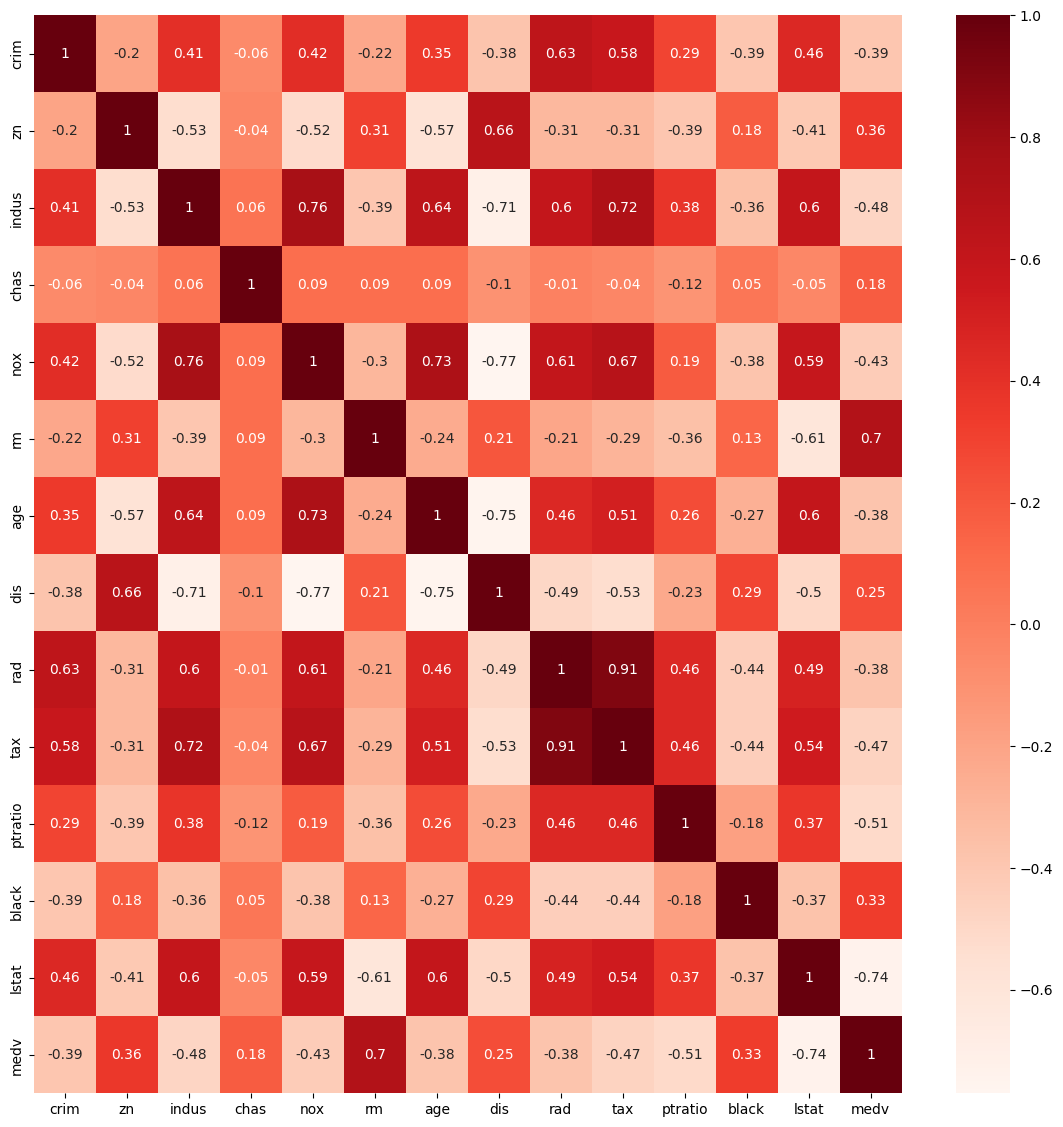

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr1 = data.corr().round(2)
corr1.shape

plt.figure(figsize=(14,14))

sns.heatmap(data=corr1, annot=True,cmap='Reds')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(32, activation='relu', name='dense_3'))
model.add(Dense(16, activation='relu', name='dense_4'))
model.add(Dense(8, activation='relu', name='dense_5'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_output (Dense)        (None, 1)                 9         
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12801 (

In [10]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.05, verbose = 1)

Epoch 1/1000
12/12 [==============================] - 2s 21ms/step - loss: 596.7118 - mae: 22.5004 - val_loss: 508.7762 - val_mae: 20.9722
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 526.0549 - mae: 20.8043 - val_loss: 393.4908 - val_mae: 18.0289
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 359.9653 - mae: 16.0572 - val_loss: 168.8903 - val_mae: 10.2523
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 169.6454 - mae: 10.1861 - val_loss: 88.7271 - val_mae: 7.5826
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 133.3891 - mae: 9.0337 - val_loss: 68.0946 - val_mae: 6.0709
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 99.5070 - mae: 7.5238 - val_loss: 58.7729 - val_mae: 5.3087
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 77.4793 - mae: 6.6768 - val_loss: 54.7519 - val_mae: 5.1726
Epoch 8/1000
12/12 [==========================

12/12 [==============================] - 0s 5ms/step - loss: 11.1314 - mae: 2.3438 - val_loss: 46.3260 - val_mae: 4.0926
Epoch 62/1000
12/12 [==============================] - 0s 5ms/step - loss: 12.3815 - mae: 2.3885 - val_loss: 44.6149 - val_mae: 4.3108
Epoch 63/1000
12/12 [==============================] - 0s 5ms/step - loss: 11.6559 - mae: 2.4409 - val_loss: 45.4888 - val_mae: 3.8312
Epoch 64/1000
12/12 [==============================] - 0s 5ms/step - loss: 10.6003 - mae: 2.3020 - val_loss: 42.9161 - val_mae: 3.9546
Epoch 65/1000
12/12 [==============================] - 0s 6ms/step - loss: 10.3139 - mae: 2.2951 - val_loss: 43.1484 - val_mae: 3.8176
Epoch 66/1000
12/12 [==============================] - 0s 6ms/step - loss: 10.3651 - mae: 2.2669 - val_loss: 43.0888 - val_mae: 3.9315
Epoch 67/1000
12/12 [==============================] - 0s 6ms/step - loss: 10.9107 - mae: 2.3723 - val_loss: 43.5303 - val_mae: 3.9541
Epoch 68/1000
12/12 [==============================] - 0s 6ms/step - 

12/12 [==============================] - 0s 5ms/step - loss: 5.9886 - mae: 1.8486 - val_loss: 30.8758 - val_mae: 3.2841
Epoch 123/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.0397 - mae: 1.8520 - val_loss: 29.9508 - val_mae: 3.4215
Epoch 124/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.2227 - mae: 1.8560 - val_loss: 30.5890 - val_mae: 3.4205
Epoch 125/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.9332 - mae: 1.8177 - val_loss: 32.3406 - val_mae: 3.5338
Epoch 126/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.2154 - mae: 1.8824 - val_loss: 30.1217 - val_mae: 3.4049
Epoch 127/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.1943 - mae: 1.8800 - val_loss: 30.3458 - val_mae: 3.5517
Epoch 128/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.5653 - mae: 1.9435 - val_loss: 28.7298 - val_mae: 3.3533
Epoch 129/1000
12/12 [==============================] - 0s 4ms/step - 

Epoch 183/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.0863 - mae: 1.7028 - val_loss: 28.8240 - val_mae: 3.0997
Epoch 184/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.7894 - mae: 1.6725 - val_loss: 28.0973 - val_mae: 3.0971
Epoch 185/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.0543 - mae: 1.7315 - val_loss: 24.8943 - val_mae: 3.1270
Epoch 186/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.8573 - mae: 1.6473 - val_loss: 23.1379 - val_mae: 2.9921
Epoch 187/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.7662 - mae: 1.6370 - val_loss: 27.9645 - val_mae: 3.0410
Epoch 188/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.6387 - mae: 1.6252 - val_loss: 28.6046 - val_mae: 3.1068
Epoch 189/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.8507 - mae: 1.6623 - val_loss: 27.0350 - val_mae: 3.0357
Epoch 190/1000
12/12 [==============================] -

Epoch 244/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.9000 - mae: 1.4733 - val_loss: 22.9114 - val_mae: 2.9401
Epoch 245/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.1415 - mae: 1.5200 - val_loss: 24.7209 - val_mae: 2.8477
Epoch 246/1000
12/12 [==============================] - 0s 3ms/step - loss: 3.9910 - mae: 1.4966 - val_loss: 23.0592 - val_mae: 2.9403
Epoch 247/1000
12/12 [==============================] - 0s 3ms/step - loss: 4.5916 - mae: 1.6652 - val_loss: 21.7485 - val_mae: 2.9679
Epoch 248/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3456 - mae: 1.5780 - val_loss: 27.3273 - val_mae: 2.9383
Epoch 249/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.1284 - mae: 1.5330 - val_loss: 24.3384 - val_mae: 2.8065
Epoch 250/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.7560 - mae: 1.6656 - val_loss: 32.4050 - val_mae: 3.2568
Epoch 251/1000
12/12 [==============================] -

Epoch 305/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.4274 - mae: 1.3771 - val_loss: 23.8798 - val_mae: 2.8389
Epoch 306/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.4128 - mae: 1.3892 - val_loss: 20.6465 - val_mae: 2.6462
Epoch 307/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.5253 - mae: 1.3934 - val_loss: 25.3182 - val_mae: 2.9535
Epoch 308/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.4546 - mae: 1.3957 - val_loss: 20.4242 - val_mae: 2.5528
Epoch 309/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6461 - mae: 1.4502 - val_loss: 24.1556 - val_mae: 3.0048
Epoch 310/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6867 - mae: 1.4707 - val_loss: 20.3743 - val_mae: 2.5549
Epoch 311/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.6834 - mae: 1.4520 - val_loss: 19.1483 - val_mae: 2.6525
Epoch 312/1000
12/12 [==============================] -

Epoch 366/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1908 - mae: 1.3408 - val_loss: 24.3148 - val_mae: 2.8441
Epoch 367/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1015 - mae: 1.2832 - val_loss: 17.3906 - val_mae: 2.7058
Epoch 368/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.8123 - mae: 1.4945 - val_loss: 19.8260 - val_mae: 2.6376
Epoch 369/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.1290 - mae: 1.3432 - val_loss: 22.8561 - val_mae: 2.7845
Epoch 370/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.3131 - mae: 1.3286 - val_loss: 20.5684 - val_mae: 2.5294
Epoch 371/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0375 - mae: 1.3032 - val_loss: 22.6543 - val_mae: 2.9015
Epoch 372/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9636 - mae: 1.2734 - val_loss: 20.1049 - val_mae: 2.5888
Epoch 373/1000
12/12 [==============================] -

Epoch 427/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.0215 - mae: 1.2910 - val_loss: 20.3257 - val_mae: 2.7202
Epoch 428/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.0030 - mae: 1.3061 - val_loss: 19.3718 - val_mae: 2.6757
Epoch 429/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.8575 - mae: 1.2627 - val_loss: 22.7014 - val_mae: 2.8484
Epoch 430/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.0064 - mae: 1.3092 - val_loss: 18.5522 - val_mae: 2.6648
Epoch 431/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9017 - mae: 1.2722 - val_loss: 22.7615 - val_mae: 2.7355
Epoch 432/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.7082 - mae: 1.2120 - val_loss: 21.4023 - val_mae: 2.7594
Epoch 433/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.8027 - mae: 1.2364 - val_loss: 19.9406 - val_mae: 2.6574
Epoch 434/1000
12/12 [==============================] -

Epoch 488/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.6513 - mae: 1.1858 - val_loss: 21.1236 - val_mae: 2.9159
Epoch 489/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.6141 - mae: 1.1815 - val_loss: 20.0966 - val_mae: 2.6850
Epoch 490/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.4106 - mae: 1.1335 - val_loss: 20.5699 - val_mae: 2.5738
Epoch 491/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.6728 - mae: 1.2148 - val_loss: 19.8471 - val_mae: 2.9393
Epoch 492/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.1031 - mae: 1.3167 - val_loss: 18.1541 - val_mae: 2.4709
Epoch 493/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.7411 - mae: 1.2444 - val_loss: 28.2380 - val_mae: 2.8830
Epoch 494/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.6594 - mae: 1.2248 - val_loss: 19.4441 - val_mae: 2.7564
Epoch 495/1000
12/12 [==============================] -

Epoch 549/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.3671 - mae: 1.1092 - val_loss: 15.9900 - val_mae: 2.4059
Epoch 550/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.3277 - mae: 1.1008 - val_loss: 21.7840 - val_mae: 2.8187
Epoch 551/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.4296 - mae: 1.1551 - val_loss: 16.9157 - val_mae: 2.5391
Epoch 552/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.9225 - mae: 1.2979 - val_loss: 19.3755 - val_mae: 2.5632
Epoch 553/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.2047 - mae: 1.0466 - val_loss: 23.6835 - val_mae: 2.7280
Epoch 554/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.1808 - mae: 1.0827 - val_loss: 18.1658 - val_mae: 2.5268
Epoch 555/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.1873 - mae: 1.0563 - val_loss: 20.7576 - val_mae: 2.7147
Epoch 556/1000
12/12 [==============================] -

Epoch 610/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.0548 - mae: 1.0153 - val_loss: 22.8482 - val_mae: 2.8015
Epoch 611/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.2809 - mae: 1.0853 - val_loss: 15.2020 - val_mae: 2.3662
Epoch 612/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.0851 - mae: 1.0369 - val_loss: 21.0115 - val_mae: 2.7779
Epoch 613/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.1738 - mae: 1.0459 - val_loss: 22.3093 - val_mae: 2.7713
Epoch 614/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.0580 - mae: 1.0119 - val_loss: 17.9826 - val_mae: 2.6426
Epoch 615/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.1123 - mae: 1.0209 - val_loss: 19.6848 - val_mae: 2.5980
Epoch 616/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.0200 - mae: 1.0304 - val_loss: 21.2541 - val_mae: 2.8775
Epoch 617/1000
12/12 [==============================] -

Epoch 671/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.2328 - mae: 1.0837 - val_loss: 18.5563 - val_mae: 2.7267
Epoch 672/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.2687 - mae: 1.1204 - val_loss: 20.9000 - val_mae: 2.7386
Epoch 673/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.1410 - mae: 1.0669 - val_loss: 22.2842 - val_mae: 2.7714
Epoch 674/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.9746 - mae: 0.9952 - val_loss: 20.2783 - val_mae: 2.7508
Epoch 675/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.0419 - mae: 0.9880 - val_loss: 20.6460 - val_mae: 2.6944
Epoch 676/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8533 - mae: 0.9443 - val_loss: 17.2241 - val_mae: 2.5559
Epoch 677/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8133 - mae: 0.9299 - val_loss: 25.4778 - val_mae: 3.0155
Epoch 678/1000
12/12 [==============================] -

Epoch 732/1000
12/12 [==============================] - 0s 5ms/step - loss: 1.7802 - mae: 0.9284 - val_loss: 22.7971 - val_mae: 2.8996
Epoch 733/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.5095 - mae: 1.1952 - val_loss: 20.0384 - val_mae: 2.7565
Epoch 734/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.3688 - mae: 1.1694 - val_loss: 19.9182 - val_mae: 2.7485
Epoch 735/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.2223 - mae: 1.0736 - val_loss: 21.2201 - val_mae: 2.8590
Epoch 736/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8351 - mae: 0.9651 - val_loss: 16.9901 - val_mae: 2.5772
Epoch 737/1000
12/12 [==============================] - 0s 5ms/step - loss: 1.8530 - mae: 0.9551 - val_loss: 22.6498 - val_mae: 2.8199
Epoch 738/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.9314 - mae: 0.9938 - val_loss: 20.2805 - val_mae: 2.7042
Epoch 739/1000
12/12 [==============================] -

Epoch 793/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.9332 - mae: 0.9636 - val_loss: 25.5496 - val_mae: 3.0484
Epoch 794/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.9251 - mae: 0.9785 - val_loss: 19.8200 - val_mae: 2.6910
Epoch 795/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.7190 - mae: 0.9060 - val_loss: 21.8271 - val_mae: 2.8696
Epoch 796/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6512 - mae: 0.8947 - val_loss: 23.5694 - val_mae: 2.9024
Epoch 797/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6453 - mae: 0.8897 - val_loss: 21.8895 - val_mae: 2.9341
Epoch 798/1000
12/12 [==============================] - 0s 5ms/step - loss: 1.6574 - mae: 0.8975 - val_loss: 20.8403 - val_mae: 2.7499
Epoch 799/1000
12/12 [==============================] - 0s 5ms/step - loss: 1.6346 - mae: 0.8809 - val_loss: 21.4381 - val_mae: 2.8120
Epoch 800/1000
12/12 [==============================] -

Epoch 854/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6457 - mae: 0.9111 - val_loss: 19.6404 - val_mae: 2.7827
Epoch 855/1000
12/12 [==============================] - 0s 3ms/step - loss: 1.6260 - mae: 0.9195 - val_loss: 18.6688 - val_mae: 2.7219
Epoch 856/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6470 - mae: 0.9140 - val_loss: 22.0710 - val_mae: 2.8466
Epoch 857/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.0480 - mae: 1.0570 - val_loss: 19.3633 - val_mae: 2.9558
Epoch 858/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.1943 - mae: 1.0937 - val_loss: 25.2329 - val_mae: 3.0088
Epoch 859/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8532 - mae: 1.0099 - val_loss: 16.0669 - val_mae: 2.6370
Epoch 860/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.0809 - mae: 1.0368 - val_loss: 20.2187 - val_mae: 2.7743
Epoch 861/1000
12/12 [==============================] -

Epoch 915/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.4853 - mae: 0.8567 - val_loss: 21.0808 - val_mae: 2.8704
Epoch 916/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6035 - mae: 0.8785 - val_loss: 24.1602 - val_mae: 3.0069
Epoch 917/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.4741 - mae: 0.8912 - val_loss: 19.0705 - val_mae: 2.7497
Epoch 918/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.5311 - mae: 0.8562 - val_loss: 20.5427 - val_mae: 2.8322
Epoch 919/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.3956 - mae: 0.8144 - val_loss: 22.8103 - val_mae: 2.8855
Epoch 920/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.5836 - mae: 0.9171 - val_loss: 21.1521 - val_mae: 2.8282
Epoch 921/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8264 - mae: 0.9901 - val_loss: 23.7437 - val_mae: 3.0100
Epoch 922/1000
12/12 [==============================] -

Epoch 976/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6462 - mae: 0.9130 - val_loss: 22.6158 - val_mae: 2.9996
Epoch 977/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.5518 - mae: 0.9117 - val_loss: 19.0350 - val_mae: 2.7981
Epoch 978/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.4191 - mae: 0.8479 - val_loss: 21.8590 - val_mae: 2.8629
Epoch 979/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.3937 - mae: 0.8127 - val_loss: 21.3982 - val_mae: 2.8411
Epoch 980/1000
12/12 [==============================] - 0s 5ms/step - loss: 1.3081 - mae: 0.7807 - val_loss: 20.5720 - val_mae: 2.8239
Epoch 981/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.3020 - mae: 0.7938 - val_loss: 21.6050 - val_mae: 2.8609
Epoch 982/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.2940 - mae: 0.7840 - val_loss: 18.3594 - val_mae: 2.7270
Epoch 983/1000
12/12 [==============================] -

In [11]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 2ms/step - loss: 10.8990 - mae: 2.1197
Mean squared error on test data:  10.899004936218262
Mean absolute error on test data:  2.1196789741516113


In [12]:
import sklearn
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]]))

In [13]:
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 [==============================] - 0s 110ms/step
Predicted house price: [[15.630605]]
